# Proyecto: Reconocimiento de Lenguaje de Señas Americano (ASL)

## Notebook 01: Descarga y Preparación Inicial de Datos

**Objetivo:** Descargar el dataset Sign Language MNIST desde Kaggle y organizar los datos en la estructura del proyecto.

**Dataset:** Sign Language MNIST - 24 clases (A-Z sin J y Z que requieren movimiento)

---

## 1. Configuración del Entorno y API de Kaggle

In [1]:
# Instalar librería de Kaggle (solo necesario en Colab)
!pip install -q kaggle

In [ ]:
import os
import sys
from pathlib import Path

# Detectar si estamos en Google Colab
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    from google.colab import drive, files
    print("Ejecutando en Google Colab. Montando Drive...")
    drive.mount('/content/drive')

    # RUTA
    PROJECT_ROOT = Path('/content/drive/MyDrive/proyecto-app-lenguaje-senas')

    if not PROJECT_ROOT.exists():
        print(f"¡Carpeta no encontrada en {PROJECT_ROOT}!")
        print("Por favor, asegúrate de que el proyecto esté en tu unidad de Drive.")
    else:
        os.chdir(PROJECT_ROOT)
        if str(PROJECT_ROOT) not in sys.path:
            sys.path.append(str(PROJECT_ROOT))
        print(f"Entorno Colab configurado. Directorio: {os.getcwd()}")

    # Configuración de Kaggle para Colab
    if not os.path.exists('/root/.kaggle/kaggle.json'):
        print("\nPara descargar los datos, sube tu archivo kaggle.json")
        uploaded = files.upload()
        !mkdir -p ~/.kaggle
        !cp kaggle.json ~/.kaggle/
        !chmod 600 ~/.kaggle/kaggle.json
        print("API de Kaggle configurada")
else:
    # Entorno Local
    PROJECT_ROOT = Path.cwd().parent if Path.cwd().name == 'notebooks' else Path.cwd()
    os.chdir(PROJECT_ROOT)
    if str(PROJECT_ROOT) not in sys.path:
        sys.path.append(str(PROJECT_ROOT))
    print(f"Entorno Local configurado. Directorio: {os.getcwd()}")

Ejecutando en Google Colab. Montando Drive...
Mounted at /content/drive
✅ Entorno Colab configurado. Directorio: /content/drive/MyDrive/proyecto-app-lenguaje-senas

Para descargar los datos, sube tu archivo kaggle.json


Saving kaggle.json to kaggle (1).json
API de Kaggle configurada


## 2. Configuración de Rutas del Proyecto

In [ ]:
from pathlib import Path

# Definir estructura de directorios
# Usamos PROJECT_ROOT para que los datos se guarden permanentemente en Drive
BASE_DIR = str(PROJECT_ROOT)

if IN_COLAB:
    print(f"Ejecutando en Colab - Los datos se guardarán en Drive: {BASE_DIR}")
else:
    print(f"Ejecutando localmente - Directorio: {BASE_DIR}")

# Crear estructura de carpetas
DATA_RAW = os.path.join(BASE_DIR, 'data', 'raw')
DATA_PROCESSED = os.path.join(BASE_DIR, 'data', 'processed')
MODELS_DIR = os.path.join(BASE_DIR, 'models')
RESULTS_DIR = os.path.join(BASE_DIR, 'results')
FIGURES_DIR = os.path.join(RESULTS_DIR, 'figures')
REPORTS_DIR = os.path.join(RESULTS_DIR, 'reports')

# Crear directorios
for directory in [DATA_RAW, DATA_PROCESSED, MODELS_DIR, FIGURES_DIR, REPORTS_DIR]:
    os.makedirs(directory, exist_ok=True)

print(f"\nEstructura de directorios creada:")
print(f"  Base: {BASE_DIR}")
print(f"  Datos crudos: {DATA_RAW}")
print(f"  Datos procesados: {DATA_PROCESSED}")
print(f"  Modelos: {MODELS_DIR}")
print(f"  Resultados: {RESULTS_DIR}")

Ejecutando en Colab - Los datos se guardarán en Drive: /content/drive/MyDrive/proyecto-app-lenguaje-senas

Estructura de directorios:
  Base: /content/drive/MyDrive/proyecto-app-lenguaje-senas
  Datos crudos: /content/drive/MyDrive/proyecto-app-lenguaje-senas/data/raw
  Datos procesados: /content/drive/MyDrive/proyecto-app-lenguaje-senas/data/processed
  Modelos: /content/drive/MyDrive/proyecto-app-lenguaje-senas/models
  Resultados: /content/drive/MyDrive/proyecto-app-lenguaje-senas/results

 Estructura de proyecto creada correctamente


## 3. Descarga del Dataset desde Kaggle

In [ ]:
import zipfile
import subprocess

# Verificar si los archivos ya existen
train_file = os.path.join(DATA_RAW, 'sign_mnist_train.csv')
test_file = os.path.join(DATA_RAW, 'sign_mnist_test.csv')

if os.path.exists(train_file) and os.path.exists(test_file):
    print("Dataset ya descargado anteriormente")
else:
    print("Descargando dataset desde Kaggle...")

    # Usar subprocess para manejar correctamente rutas con espacios
    try:
        result = subprocess.run(
            ['kaggle', 'datasets', 'download', '-d', 'datamunge/sign-language-mnist', '-p', DATA_RAW],
            check=True,
            capture_output=True,
            text=True
        )
        print(result.stdout)
        print("Dataset descargado exitosamente")
    except subprocess.CalledProcessError as e:
        print(f"Error al descargar: {e}")
        print(f"Salida de error: {e.stderr}")
    except FileNotFoundError:
        print("Error: kaggle no está instalado o no está en el PATH")
        print("Instala con: pip install kaggle")

    # Descomprimir
    zip_path = os.path.join(DATA_RAW, 'sign-language-mnist.zip')
    if os.path.exists(zip_path):
        print("Descomprimiendo archivos...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(DATA_RAW)
        print("Archivos extraídos exitosamente")

        # Eliminar archivo zip para ahorrar espacio
        os.remove(zip_path)
        print("Archivo zip eliminado")
    else:
        print("No se encontró el archivo zip")

# Verificar archivos finales
if os.path.exists(train_file) and os.path.exists(test_file):
    print(f"\nArchivos listos:")
    print(f"  - {os.path.basename(train_file)}")
    print(f"  - {os.path.basename(test_file)}")
else:
    print("\nAlgunos archivos no se encontraron. Verifica la descarga.")

✓ Dataset ya descargado anteriormente

✓ Archivos listos:
  - sign_mnist_train.csv
  - sign_mnist_test.csv


## 4. Verificación de Datos Descargados

In [5]:
import pandas as pd
import numpy as np

# Cargar archivos CSV
train_path = os.path.join(DATA_RAW, 'sign_mnist_train.csv')
test_path = os.path.join(DATA_RAW, 'sign_mnist_test.csv')

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print("=" * 60)
print("INFORMACIÓN DEL DATASET")
print("=" * 60)
print(f"\nConjunto de entrenamiento: {train_df.shape[0]:,} imágenes")
print(f"Conjunto de prueba: {test_df.shape[0]:,} imágenes")
print(f"Total de imágenes: {train_df.shape[0] + test_df.shape[0]:,}")
print(f"\nColumnas por imagen: {train_df.shape[1]} (1 label + 784 pixels)")
print(f"Dimensión de imagen: 28x28 pixels")
print(f"\nClases únicas en entrenamiento: {sorted(train_df['label'].unique())}")
print(f"Clases únicas en prueba: {sorted(test_df['label'].unique())}")
print(f"Número de clases: {train_df['label'].nunique()}")

# Mapeo de índices a letras
label_to_letter = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I',
    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R',
    18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y'
}

print(f"\nLetras representadas: {list(label_to_letter.values())}")
print("\nNota: Las letras J (9) y Z (25) no están incluidas porque requieren movimiento")
print("=" * 60)

INFORMACIÓN DEL DATASET

Conjunto de entrenamiento: 27,455 imágenes
Conjunto de prueba: 7,172 imágenes
Total de imágenes: 34,627

Columnas por imagen: 785 (1 label + 784 pixels)
Dimensión de imagen: 28x28 pixels

Clases únicas en entrenamiento: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24)]
Clases únicas en prueba: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24)]
Número de clases: 24

Letras representadas: ['A', 'B', 'C', 'D', 'E', 'F',

## 5. Vista Previa Rápida de los Datos

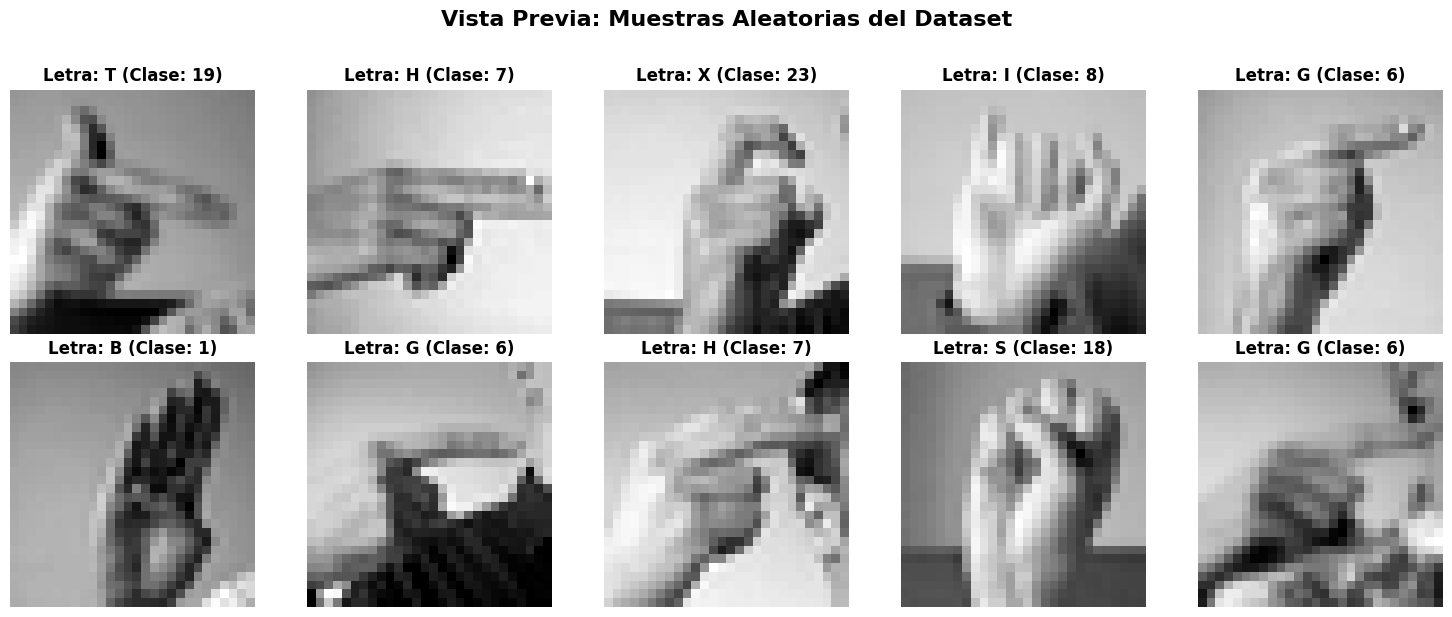

Vista previa generada y guardada


In [6]:
import matplotlib.pyplot as plt

# Visualizar algunas imágenes de muestra
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i in range(10):
    # Seleccionar una muestra aleatoria
    idx = np.random.randint(0, len(train_df))
    img = train_df.iloc[idx, 1:].values.reshape(28, 28)
    label = train_df.iloc[idx, 0]
    letter = label_to_letter.get(label, f"Desconocida ({label})")

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Letra: {letter} (Clase: {label})', fontsize=12, fontweight='bold')
    axes[i].axis('off')

plt.suptitle('Vista Previa: Muestras Aleatorias del Dataset', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, '01_vista_previa_dataset.png'), dpi=150, bbox_inches='tight')
plt.show()

print("Vista previa generada y guardada")

## 6. Resumen de Información Estadística Básica

In [7]:
# Estadísticas de distribución de clases
print("\nDistribución de clases en Entrenamiento:")
train_class_dist = train_df['label'].value_counts().sort_index()
for label, count in train_class_dist.items():
    letter = label_to_letter.get(label, f"Desconocida ({label})")
    percentage = (count / len(train_df)) * 100
    print(f"  {letter} (Clase {label:2d}): {count:5d} imágenes ({percentage:5.2f}%)")

print("\nDistribución de clases en Prueba:")
test_class_dist = test_df['label'].value_counts().sort_index()
for label, count in test_class_dist.items():
    letter = label_to_letter.get(label, f"Desconocida ({label})")
    percentage = (count / len(test_df)) * 100
    print(f"  {letter} (Clase {label:2d}): {count:5d} imágenes ({percentage:5.2f}%)")


Distribución de clases en Entrenamiento:
  A (Clase  0):  1126 imágenes ( 4.10%)
  B (Clase  1):  1010 imágenes ( 3.68%)
  C (Clase  2):  1144 imágenes ( 4.17%)
  D (Clase  3):  1196 imágenes ( 4.36%)
  E (Clase  4):   957 imágenes ( 3.49%)
  F (Clase  5):  1204 imágenes ( 4.39%)
  G (Clase  6):  1090 imágenes ( 3.97%)
  H (Clase  7):  1013 imágenes ( 3.69%)
  I (Clase  8):  1162 imágenes ( 4.23%)
  K (Clase 10):  1114 imágenes ( 4.06%)
  L (Clase 11):  1241 imágenes ( 4.52%)
  M (Clase 12):  1055 imágenes ( 3.84%)
  N (Clase 13):  1151 imágenes ( 4.19%)
  O (Clase 14):  1196 imágenes ( 4.36%)
  P (Clase 15):  1088 imágenes ( 3.96%)
  Q (Clase 16):  1279 imágenes ( 4.66%)
  R (Clase 17):  1294 imágenes ( 4.71%)
  S (Clase 18):  1199 imágenes ( 4.37%)
  T (Clase 19):  1186 imágenes ( 4.32%)
  U (Clase 20):  1161 imágenes ( 4.23%)
  V (Clase 21):  1082 imágenes ( 3.94%)
  W (Clase 22):  1225 imágenes ( 4.46%)
  X (Clase 23):  1164 imágenes ( 4.24%)
  Y (Clase 24):  1118 imágenes ( 4.07%

## 7. Guardar Información del Dataset

In [ ]:
import json

# Guardar metadatos del dataset
metadata = {
    'dataset_name': 'Sign Language MNIST',
    'source': 'Kaggle - datamunge/sign-language-mnist',
    'num_classes': 24,
    'image_size': [28, 28],
    'train_samples': int(len(train_df)),
    'test_samples': int(len(test_df)),
    'total_samples': int(len(train_df) + len(test_df)),
    'label_mapping': {str(k): v for k, v in label_to_letter.items()},  # Convertir keys a string para JSON
    'missing_labels': [9, 25],  # J y Z
    'missing_letters': ['J', 'Z'],
    'train_class_distribution': {str(k): int(v) for k, v in train_class_dist.items()},
    'test_class_distribution': {str(k): int(v) for k, v in test_class_dist.items()}
}

metadata_path = os.path.join(DATA_RAW, 'dataset_metadata.json')
with open(metadata_path, 'w', encoding='utf-8') as f:
    json.dump(metadata, f, indent=4, ensure_ascii=False)

print(f"Metadatos guardados en: {metadata_path}")

✓ Metadatos guardados en: /content/drive/MyDrive/proyecto-app-lenguaje-senas/data/raw/dataset_metadata.json


## Resumen

En este notebook hemos:

1. Configurado las credenciales de Kaggle
2. Creado la estructura de directorios del proyecto
3. Descargado y extraído el dataset Sign Language MNIST
4. Verificado la integridad de los datos
5. Generado visualizaciones preliminares
6. Guardado metadatos del dataset

**Próximo paso:** Notebook 02 - Análisis Exploratorio de Datos (EDA) detallado